In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100

df = pd.read_table('./datasets/tested.csv', sep = ',')

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#wyświetl df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#wyświelt podsumowanie df za pomocą describe. Co jest alarmujące?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
#wyrzuć z df te kolumny, które prawdopodobnie nic nie wnoszą
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [6]:
#wyświetl df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [7]:
#użyj one-hot encoding na danych nominalnych
temp = pd.get_dummies(df.Sex, prefix='is')
temp2 = pd.get_dummies(df.Embarked, prefix='is')


In [8]:

df['Sex_female']=temp['is_female']
df['Embarked_C'] = temp2['is_C']
df['Embarked_Q'] = temp2['is_Q']

In [9]:
#wyświetl df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Embarked_C,Embarked_Q
0,0,3,male,34.5,0,0,7.8292,Q,False,False,True
1,1,3,female,47.0,1,0,7.0000,S,True,False,False
2,0,2,male,62.0,0,0,9.6875,Q,False,False,True
3,0,3,male,27.0,0,0,8.6625,S,False,False,False
4,1,3,female,22.0,1,1,12.2875,S,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S,False,False,False
414,1,1,female,39.0,0,0,108.9000,C,True,True,False
415,0,3,male,38.5,0,0,7.2500,S,False,False,False
416,0,3,male,NaN,0,0,8.0500,S,False,False,False


In [10]:
#usuń nadmiarowe kolumny
df=df.drop(columns='Sex')
df=df.drop(columns='Embarked')

In [11]:
#wyświetl df
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,0,3,34.5,0,0,7.8292,False,False,True
1,1,3,47.0,1,0,7.0000,True,False,False
2,0,2,62.0,0,0,9.6875,False,False,True
3,0,3,27.0,0,0,8.6625,False,False,False
4,1,3,22.0,1,1,12.2875,True,False,False
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,False,False,False
414,1,1,39.0,0,0,108.9000,True,True,False
415,0,3,38.5,0,0,7.2500,False,False,False
416,0,3,NaN,0,0,8.0500,False,False,False


In [12]:
#wypełnij braki danych w kolumne Age za pomocą sredniej wartości z tej kolumny

mean_value = df["Age"].mean()
df = df.fillna(mean_value)

In [13]:
#skalujemy do wartości 0-1 tylko wybrane kolumny. W tej komórce nie musisz nic robić
cols_to_scale = ['Pclass','Age','Fare']

scaler = p.StandardScaler().fit(df[cols_to_scale])

df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [14]:
#wyświetl df
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,0,0.873482,0.334993,0,0,-0.498172,False,False,True
1,1,0.873482,1.325530,1,0,-0.513039,True,False,False
2,0,-0.315819,2.514175,0,0,-0.464854,False,False,True
3,0,0.873482,-0.259330,0,0,-0.483231,False,False,False
4,1,0.873482,-0.655545,1,1,-0.418237,True,False,False
...,...,...,...,...,...,...,...,...,...
413,0,0.873482,0.000000,0,0,-0.494213,False,False,False
414,1,-1.505120,0.691586,0,0,1.313968,True,True,False
415,0,0.873482,0.651965,0,0,-0.508557,False,False,False
416,0,0.873482,0.000000,0,0,-0.494213,False,False,False


In [15]:
#podział df na dane i labele 
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q']]
y = df[['Survived']]

In [19]:
#podziel X i y na zbiory uczące i testowe za pomocą train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [25]:
#zbuduj modej sieci. W tym przypadku ostatnia warstwa powinna mieć jeden neuron i sigmoidalną funkcję aktywacji
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))


In [26]:
#binary_crossentropy bo mamy tylko jeden neuron z sigmoidalną funkcją aktywacji
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [28]:
#naucz sieć
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=[es])

Epoch 1/100
9/9 [==============================] - 3s 128ms/step - loss: 0.7662 - accuracy: 0.4569 - val_loss: 0.7346 - val_accuracy: 0.4776
Epoch 2/100
9/9 [==============================] - 0s 33ms/step - loss: 0.7409 - accuracy: 0.4682 - val_loss: 0.7155 - val_accuracy: 0.4776
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7157 - accuracy: 0.5094 - val_loss: 0.6985 - val_accuracy: 0.5224
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6938 - accuracy: 0.6854 - val_loss: 0.6828 - val_accuracy: 0.7463
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.6728 - accuracy: 0.7828 - val_loss: 0.6668 - val_accuracy: 0.8060
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6526 - accuracy: 0.7903 - val_loss: 0.6513 - val_accuracy: 0.8507
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6340 - accuracy: 0.7978 - val_loss: 0.6368 - val_accuracy: 0.8507
Epoch 8/100
9/9 [===

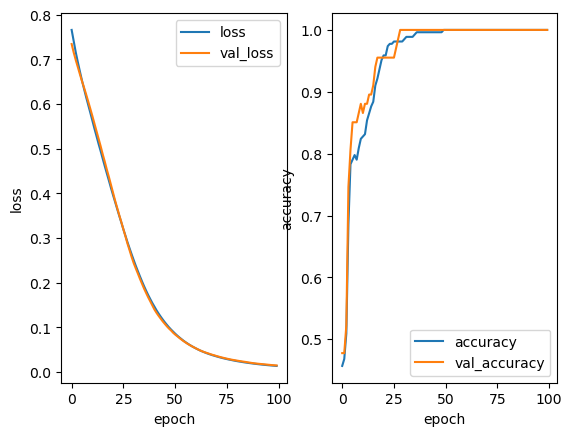

<Figure size 640x480 with 0 Axes>

In [29]:
#wyświetl wykresy uczenia
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()